In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the cleaned data
df = pd.read_excel("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/data_cleaned.xls")
# first rows of the DataFrame
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,repayment_status_sept,repayment_status_aug,repayment_status_july,repayment_status_june,repayment_status_may,...,bill_may,bill_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,default,is_outlier
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,0
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,0
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,1


In [3]:
# Convert 'SEX', 'EDUCATION', and 'MARRIAGE' to categorical variables
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['default'] = df['default'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29130 entries, 0 to 29129
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   LIMIT_BAL               29130 non-null  int64   
 1   SEX                     29130 non-null  category
 2   EDUCATION               29130 non-null  category
 3   MARRIAGE                29130 non-null  category
 4   AGE                     29130 non-null  int64   
 5   repayment_status_sept   29130 non-null  int64   
 6   repayment_status_aug    29130 non-null  int64   
 7   repayment_status_july   29130 non-null  int64   
 8   repayment_status_june   29130 non-null  int64   
 9   repayment_status_may    29130 non-null  int64   
 10  repayment_status_april  29130 non-null  int64   
 11  bill_sept               29130 non-null  int64   
 12  bill_aug                29130 non-null  int64   
 13  bill_july               29130 non-null  int64   
 14  bill_june             

In [4]:
df1=df.copy()

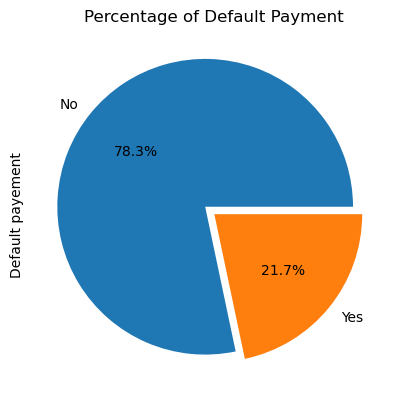

In [5]:
#Percentage of default payement
df1['default'].value_counts().plot(kind='pie',explode=[0.08,0],autopct='%1.1f%%',labels=['No', 'Yes'])
plt.title('Percentage of Default Payment')
plt.ylabel('Default payement')
plt.show()

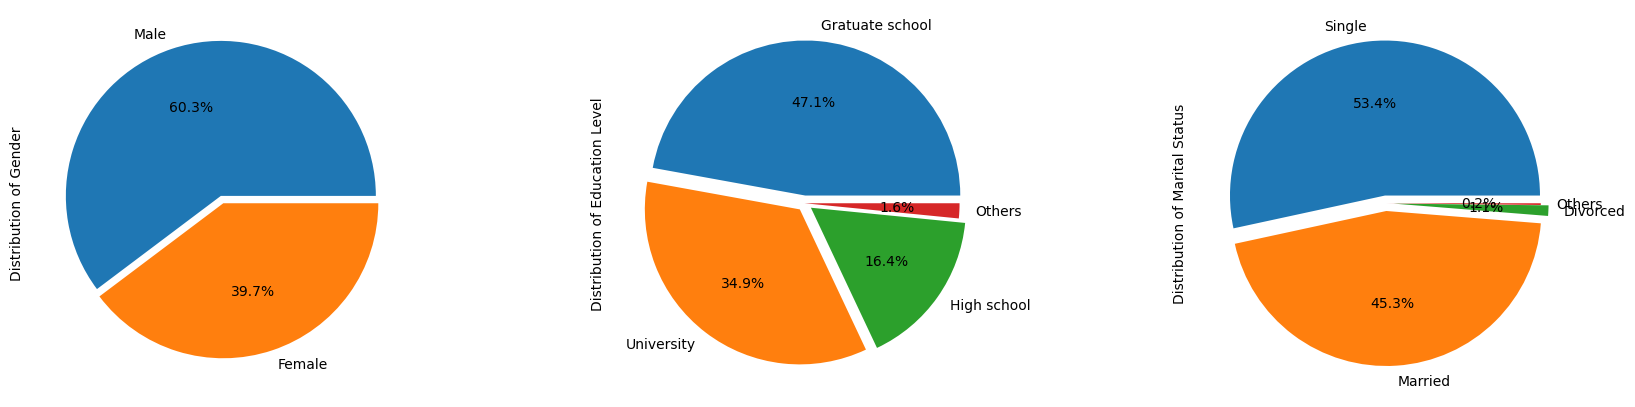

In [6]:
Sex=df1['SEX'].map({1: 'Male', 2: 'Female'})
Education=df1['EDUCATION'].map({0: 'Others', 1: 'Graduate School', 2: 'University', 3: 'High School'})
Marriage=df1['MARRIAGE'].map({0: 'Others', 1: 'Married', 2: 'Single', 3: 'Divorced'})

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plotting pie chart for 'SEX'
Sex.value_counts().plot(kind='pie', explode=[0.05, 0], autopct='%1.1f%%', labels=['Male', 'Female'], ax=axes[0])
axes[0].set_ylabel('Distribution of Gender')

# Plotting pie chart for 'EDUCATION'
Education.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0.05, 0.05, 0],labels=['Gratuate school', 'University','High school','Others'], ax=axes[1])
axes[1].set_ylabel('Distribution of Education Level')

# Plotting pie chart for 'MARRIAGE'
Marriage.value_counts().plot(kind='pie', autopct='%1.1f%%',explode=[0.05, 0.05, 0.05, 0], ax=axes[2])
axes[2].set_ylabel('Distribution of Marital Status')


plt.subplots_adjust(wspace=0.5)
plt.show()


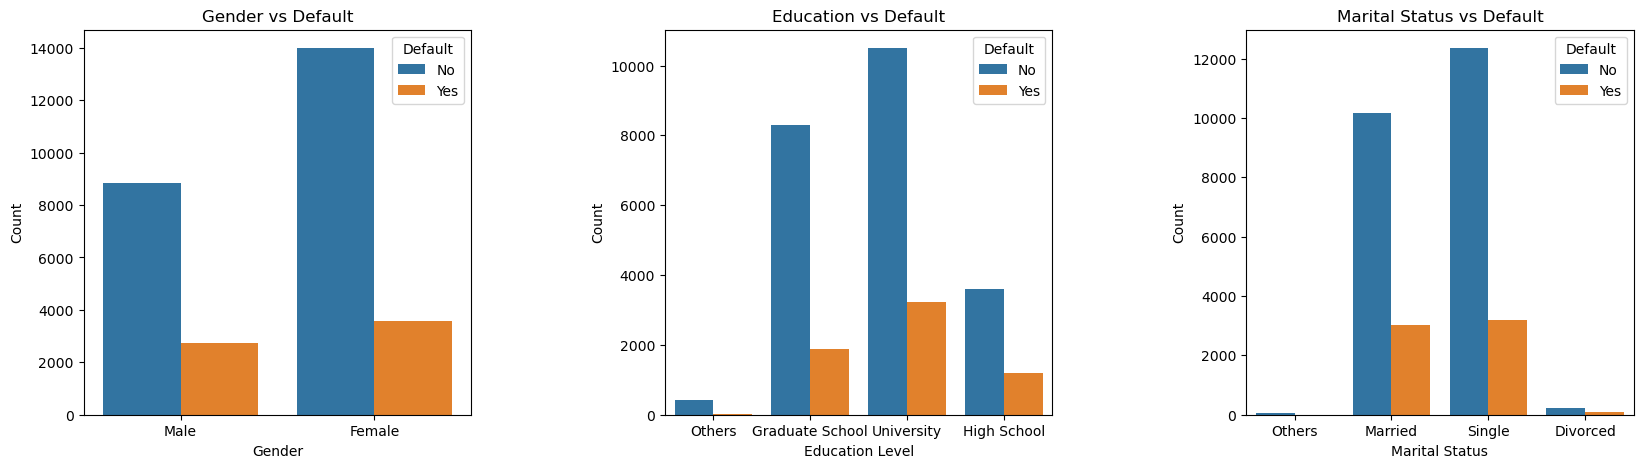

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plotting bar chart for 'SEX' and 'default'
sns.countplot(x=Sex, hue='default', data=df1, ax=axes[0])
axes[0].set_title('Gender vs Default')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Male', 'Female'])
axes[0].legend(title='Default', labels=['No', 'Yes'])

# Plotting bar chart for 'EDUCATION' and 'default'
sns.countplot(x=Education, hue='default', data=df1, ax=axes[1])
axes[1].set_title('Education vs Default')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].legend(title='Default', labels=['No', 'Yes']) 

# Plotting bar chart for 'MARRIAGE' and 'default'
sns.countplot(x=Marriage, hue='default', data=df1, ax=axes[2])
axes[2].set_title('Marital Status vs Default')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Count')
axes[2].legend(title='Default', labels=['No', 'Yes'])


plt.subplots_adjust(wspace=0.5)
plt.show()

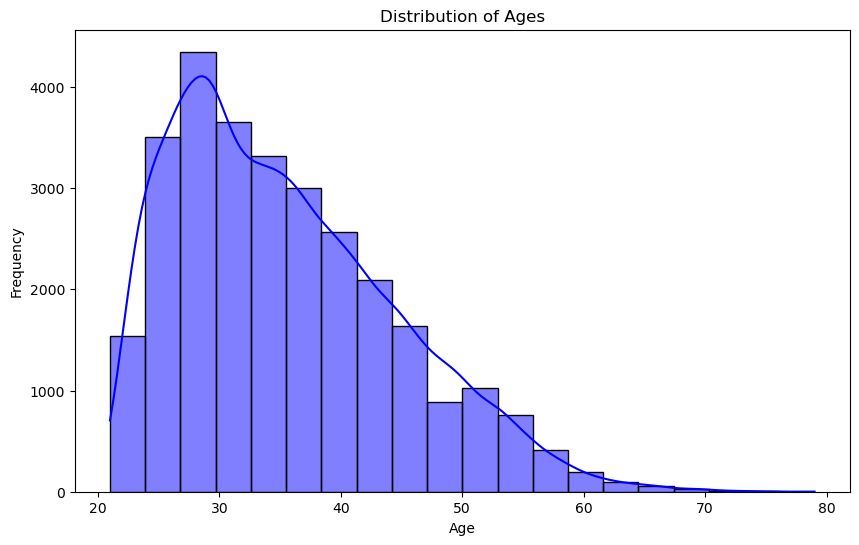

In [8]:
# Plot a histogram of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

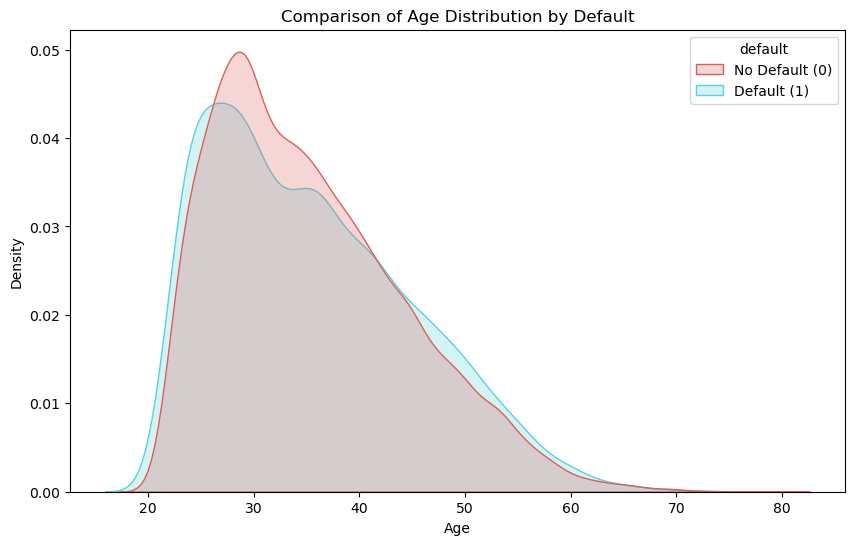

In [9]:
# Plot KDE plot for ages by default category
plt.figure(figsize=(10, 6))
_=sns.kdeplot(data=df1, x='AGE', hue='default', fill=True, palette='hls', common_norm=False)

plt.title('Comparison of Age Distribution by Default')
plt.xlabel('Age')
plt.ylabel('Density')

_.legend_.texts[0].set_text('No Default (0)')
_.legend_.texts[1].set_text('Default (1)')


plt.show()

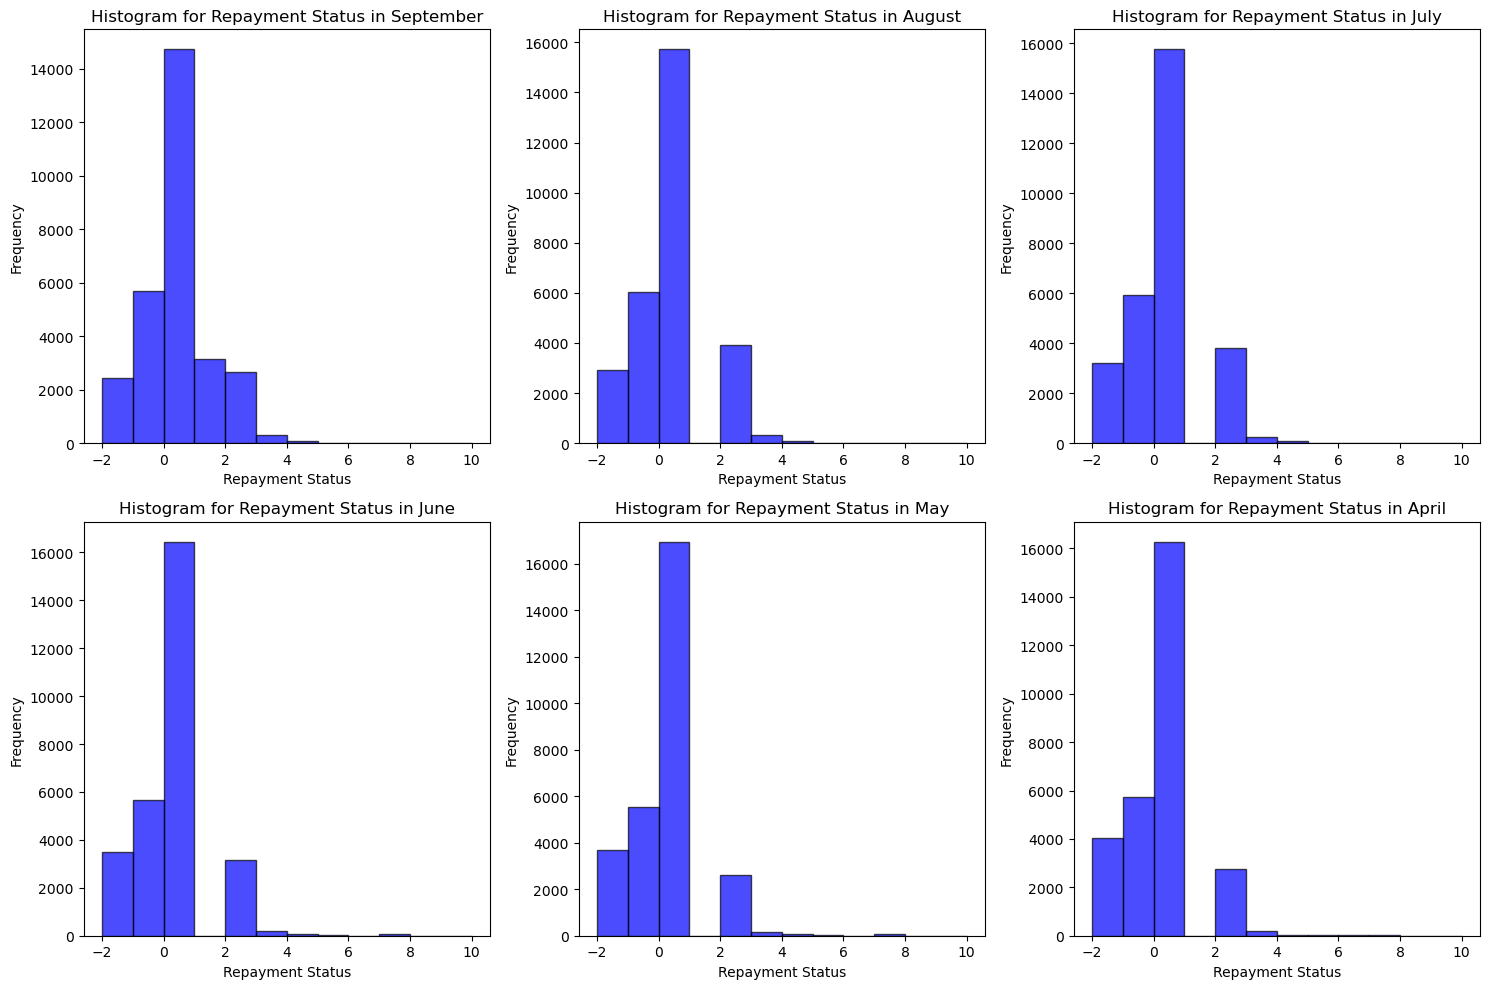

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for each repayment status variable
axes[0].hist(df1['repayment_status_sept'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram for Repayment Status in September')
axes[0].set_xlabel('Repayment Status')
axes[0].set_ylabel('Frequency')

axes[1].hist(df1['repayment_status_aug'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title('Histogram for Repayment Status in August')
axes[1].set_xlabel('Repayment Status')
axes[1].set_ylabel('Frequency')

axes[2].hist(df1['repayment_status_july'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[2].set_title('Histogram for Repayment Status in July')
axes[2].set_xlabel('Repayment Status')
axes[2].set_ylabel('Frequency')

axes[3].hist(df1['repayment_status_june'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[3].set_title('Histogram for Repayment Status in June')
axes[3].set_xlabel('Repayment Status')
axes[3].set_ylabel('Frequency')

axes[4].hist(df1['repayment_status_may'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[4].set_title('Histogram for Repayment Status in May')
axes[4].set_xlabel('Repayment Status')
axes[4].set_ylabel('Frequency')

axes[5].hist(df1['repayment_status_april'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[5].set_title('Histogram for Repayment Status in April')
axes[5].set_xlabel('Repayment Status')
axes[5].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


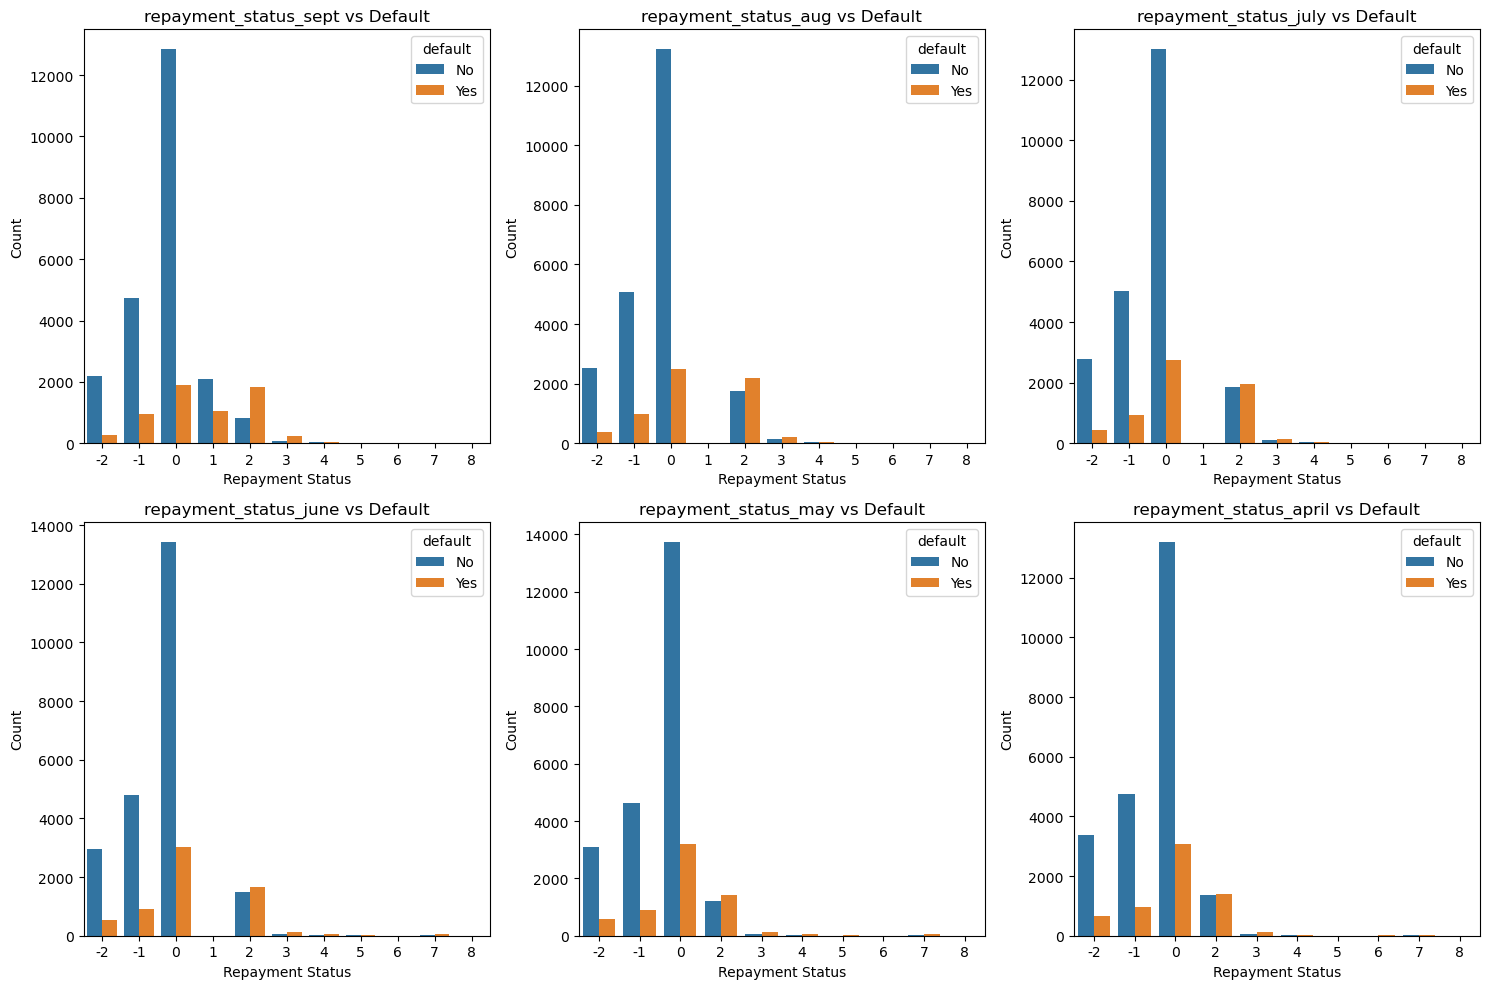

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot bar plots for each repayment status variable with respect to default
for i, col in enumerate(['repayment_status_sept', 'repayment_status_aug', 'repayment_status_july',
                         'repayment_status_june', 'repayment_status_may', 'repayment_status_april']):
    sns.countplot(x=col, hue='default', data=df1.replace({'default': {0: 'No', 1: 'Yes'}}), ax=axes[i])
    axes[i].set_title(f'{col} vs Default')
    axes[i].set_xlabel('Repayment Status')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

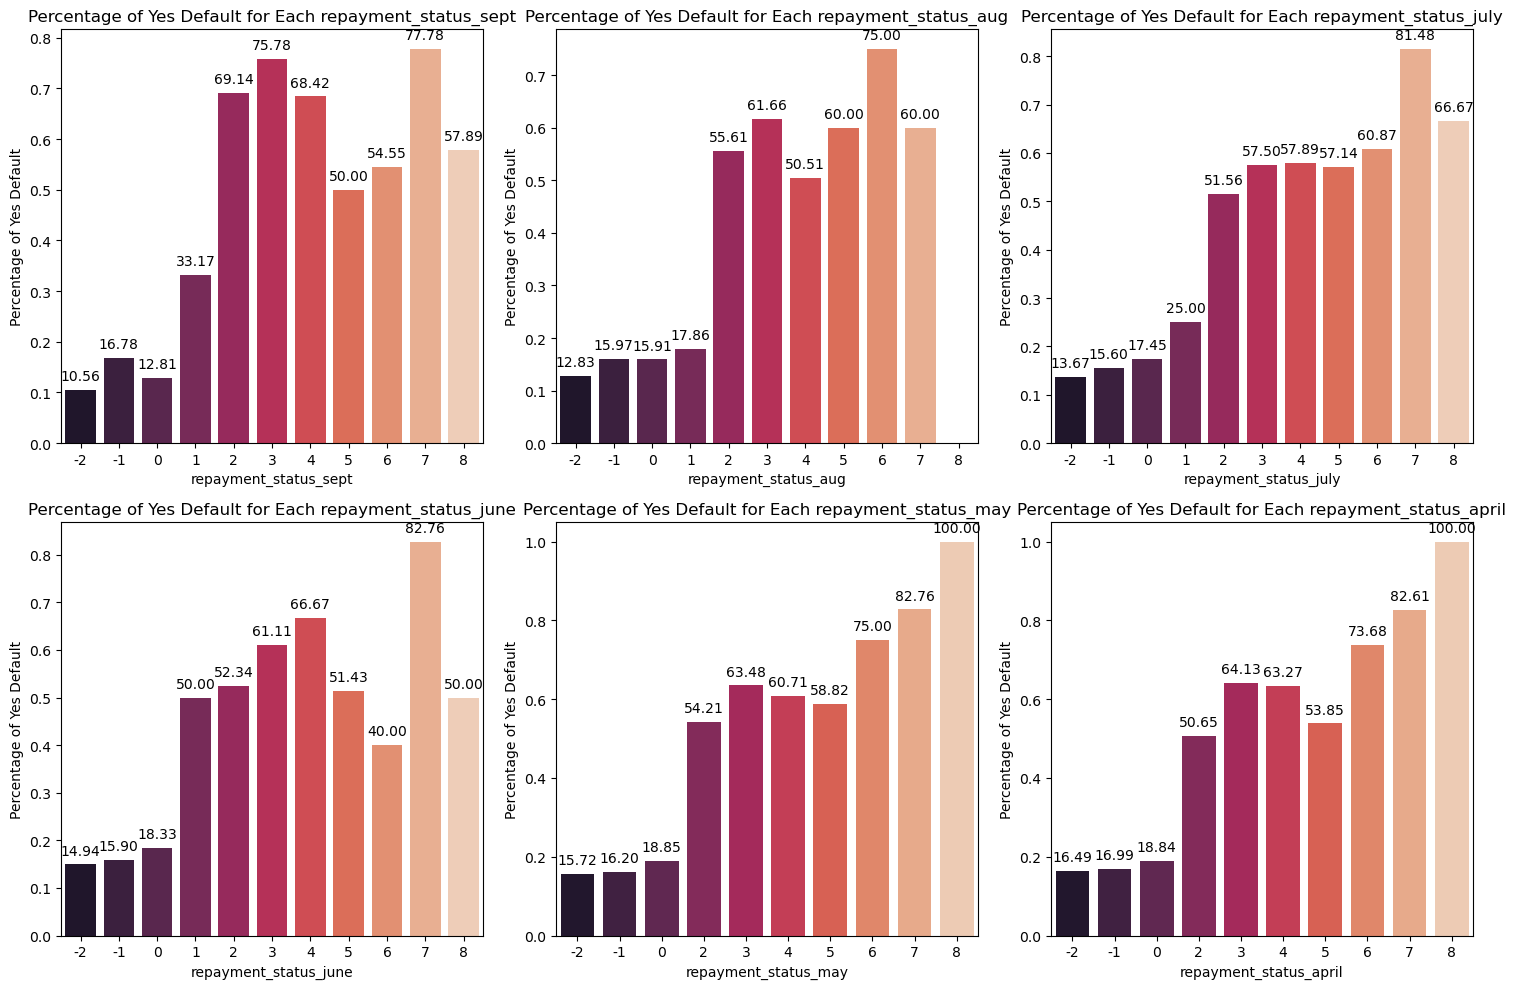

In [12]:
#Bar plots of percentage of default for each repayment status variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

repayment_variables = ['repayment_status_sept', 'repayment_status_aug', 'repayment_status_july',
                        'repayment_status_june', 'repayment_status_may', 'repayment_status_april']

for i, variable in enumerate(repayment_variables):
    data = df1[df1['default'] == 1].groupby(variable).size() / df.groupby(variable).size()
    data = data.reset_index(name='Percentage')

    barplot = sns.barplot(x=variable, y='Percentage', data=data, palette='rocket', ax=axes.flatten()[i])

    for p in barplot.patches:
        barplot.annotate(f"{p.get_height()*100:.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

    axes.flatten()[i].set_title(f'Percentage of Yes Default for Each {variable}')
    axes.flatten()[i].set_xlabel(variable)
    axes.flatten()[i].set_ylabel('Percentage of Yes Default')

plt.tight_layout()
plt.show()


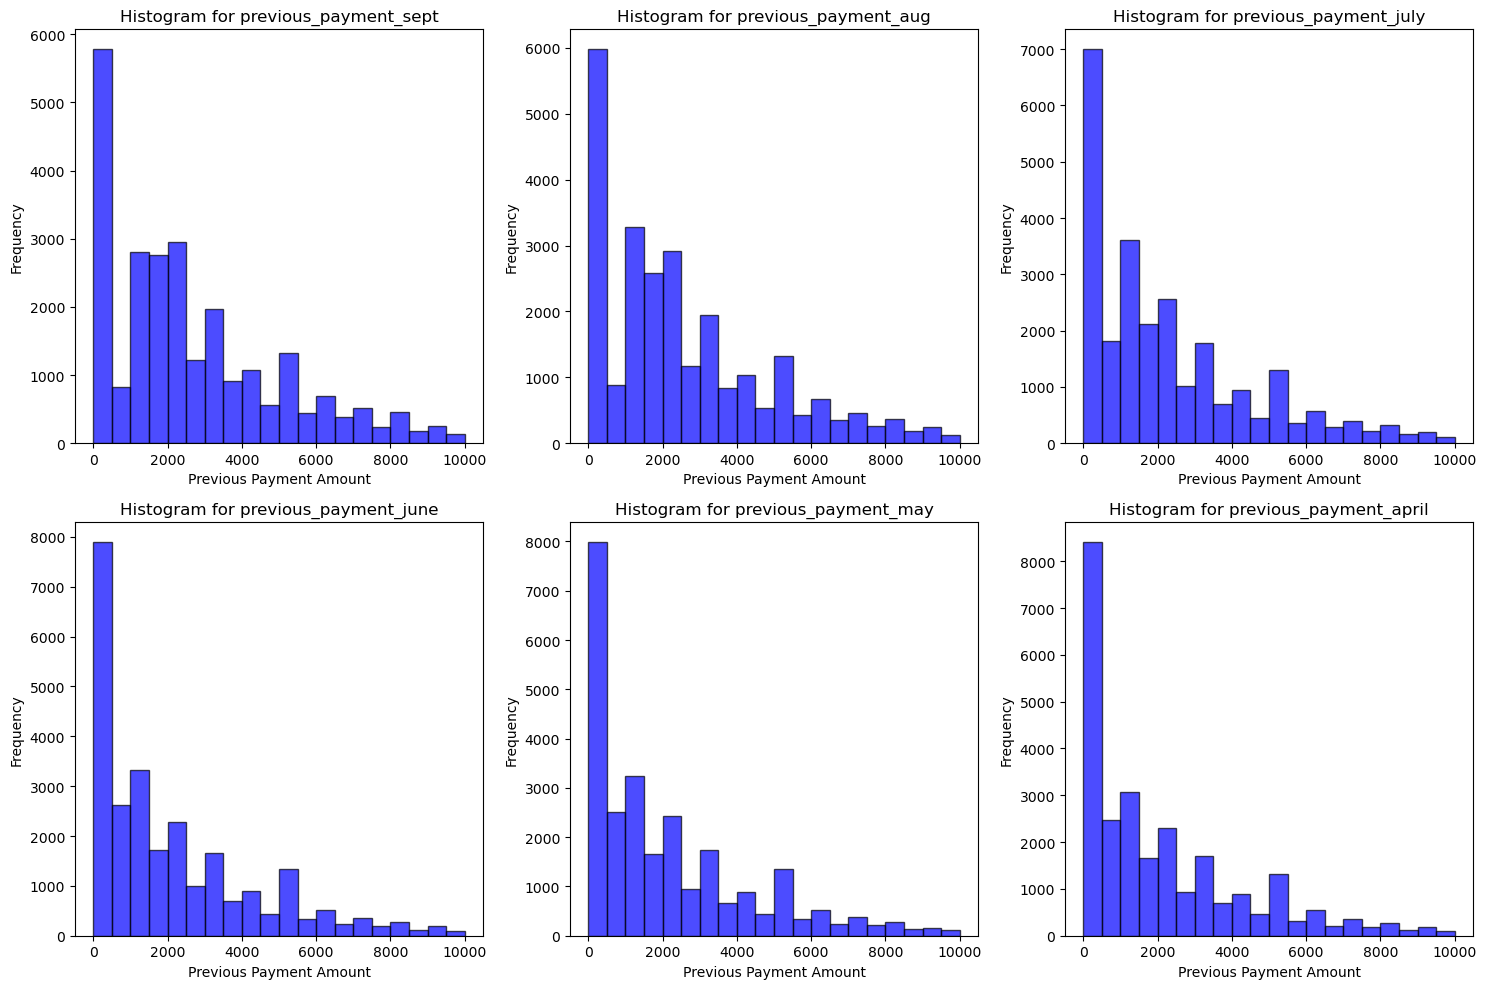

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot histogram for each previous_payment variable
previous_payment_variables = ['previous_payment_sept', 'previous_payment_aug', 'previous_payment_july',
                               'previous_payment_june', 'previous_payment_may', 'previous_payment_april']

for i, variable in enumerate(previous_payment_variables):

    bins = [x for x in range(0, 10001, 500)] + [np.inf]

    axes.flatten()[i].hist(df1[variable], bins=bins, color='blue', edgecolor='black', alpha=0.7)
    axes.flatten()[i].set_title(f'Histogram for {variable}')
    axes.flatten()[i].set_xlabel('Previous Payment Amount')
    axes.flatten()[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

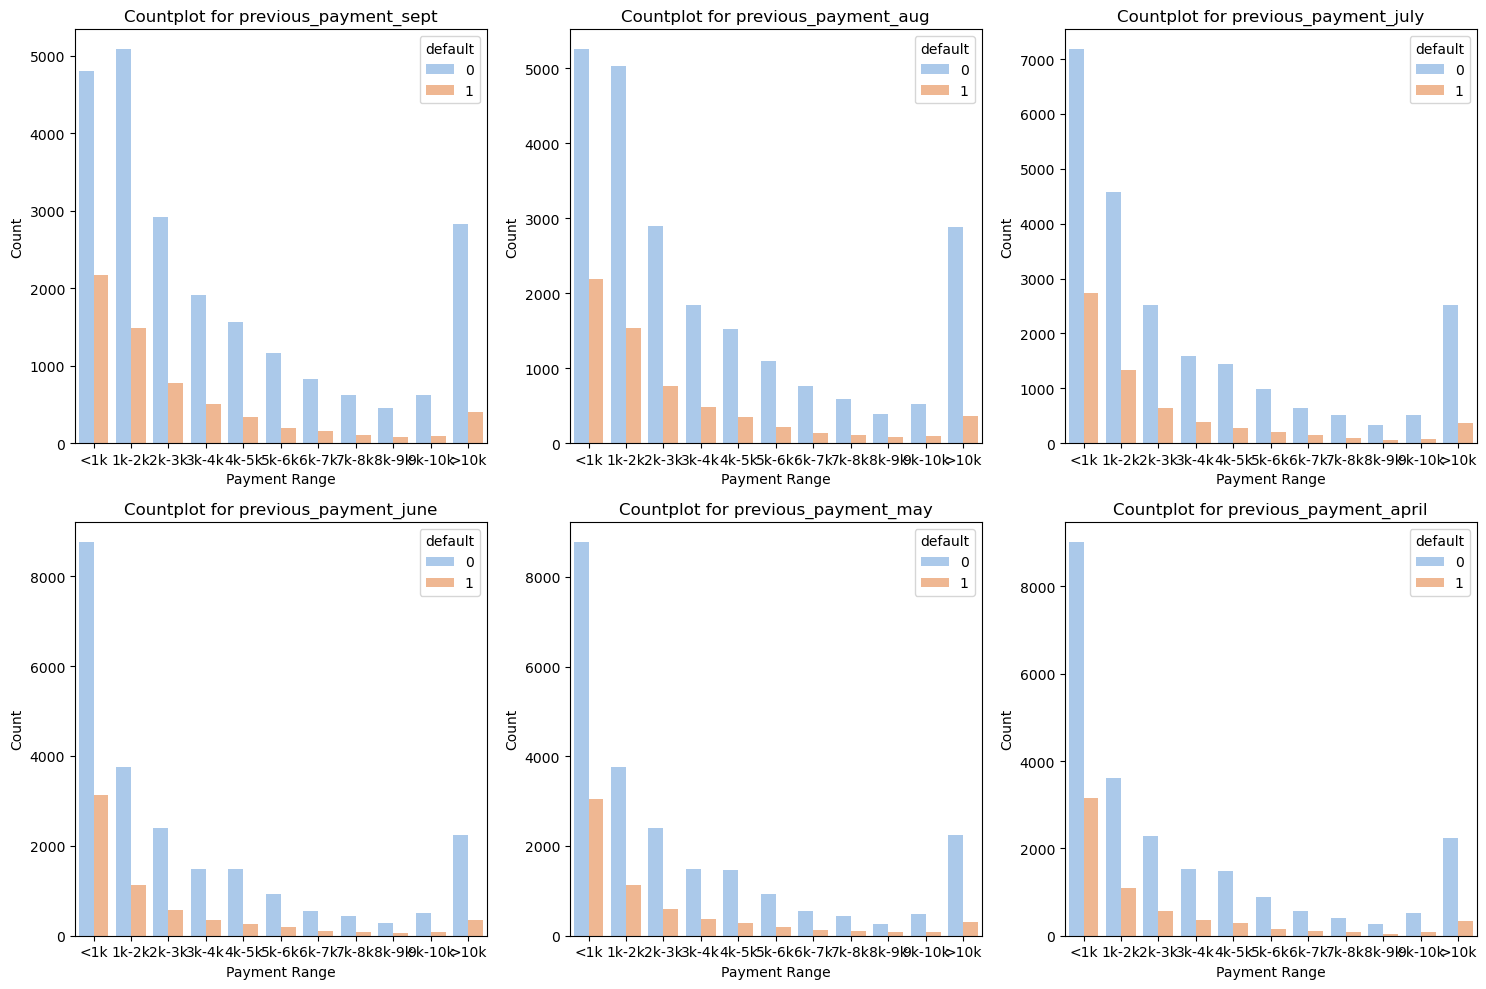

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Create a count plot showing the distribution of payment ranges with respect to default
bins = [-float('inf'), 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, float('inf')]
labels = ['<1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k', '7k-8k', '8k-9k', '9k-10k','>10k']

for i, variable in enumerate(previous_payment_variables):
    df1[f'payment_{variable[-3:]}'] = pd.cut(df1[variable], bins=bins, labels=labels, include_lowest=True)
    sns.countplot(x=f'payment_{variable[-3:]}', hue='default', data=df1, palette='pastel', ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'Countplot for {variable}')
    axes.flatten()[i].set_xlabel('Payment Range')
    axes.flatten()[i].set_ylabel('Count')


plt.tight_layout()
plt.show()


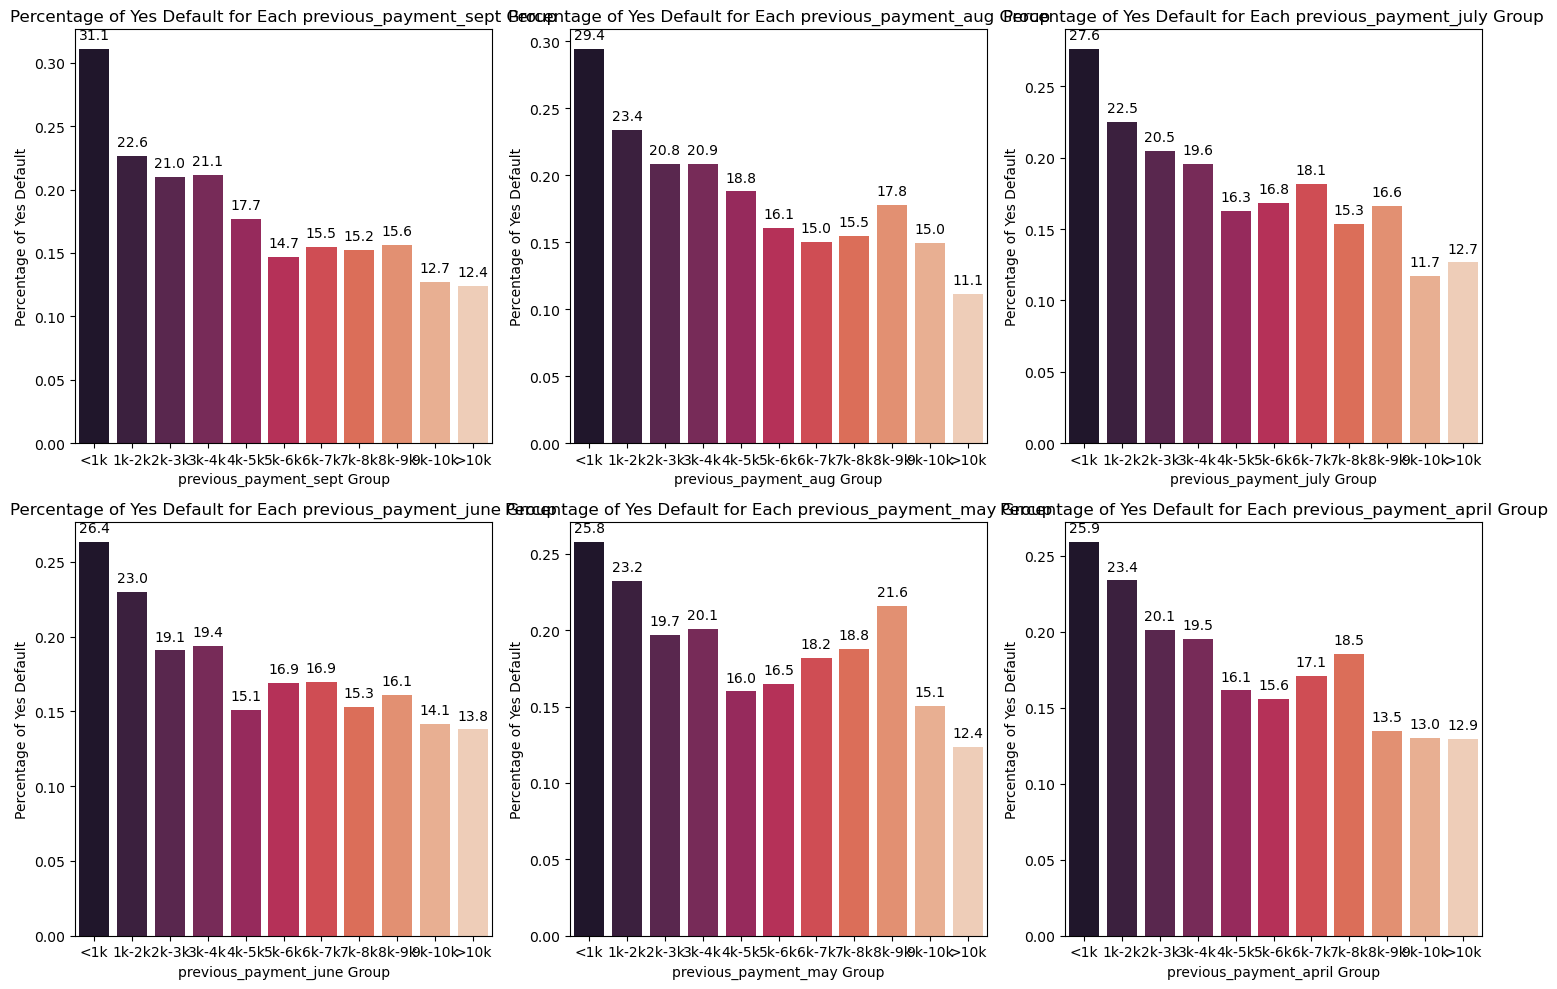

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

#Create a bar plot showing the percentage of default for each previous payement variable
for i, variable in enumerate(previous_payment_variables):
    df1[f'{variable}_group'] = pd.cut(df1[variable], bins=bins, labels=labels, include_lowest=True)
    data = df1[df1['default'] == 1].groupby(f'{variable}_group').size() / df1.groupby(f'{variable}_group').size()
    data = data.reset_index(name='Percentage')
    barplot = sns.barplot(x=f'{variable}_group', y='Percentage', data=data, palette='rocket', ax=axes.flatten()[i])

    for p in barplot.patches:
        barplot.annotate(f"{p.get_height()*100:.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

    axes.flatten()[i].set_title(f'Percentage of Yes Default for Each {variable} Group')
    axes.flatten()[i].set_xlabel(f'{variable} Group')
    axes.flatten()[i].set_ylabel('Percentage of Yes Default')


plt.tight_layout()
plt.show()


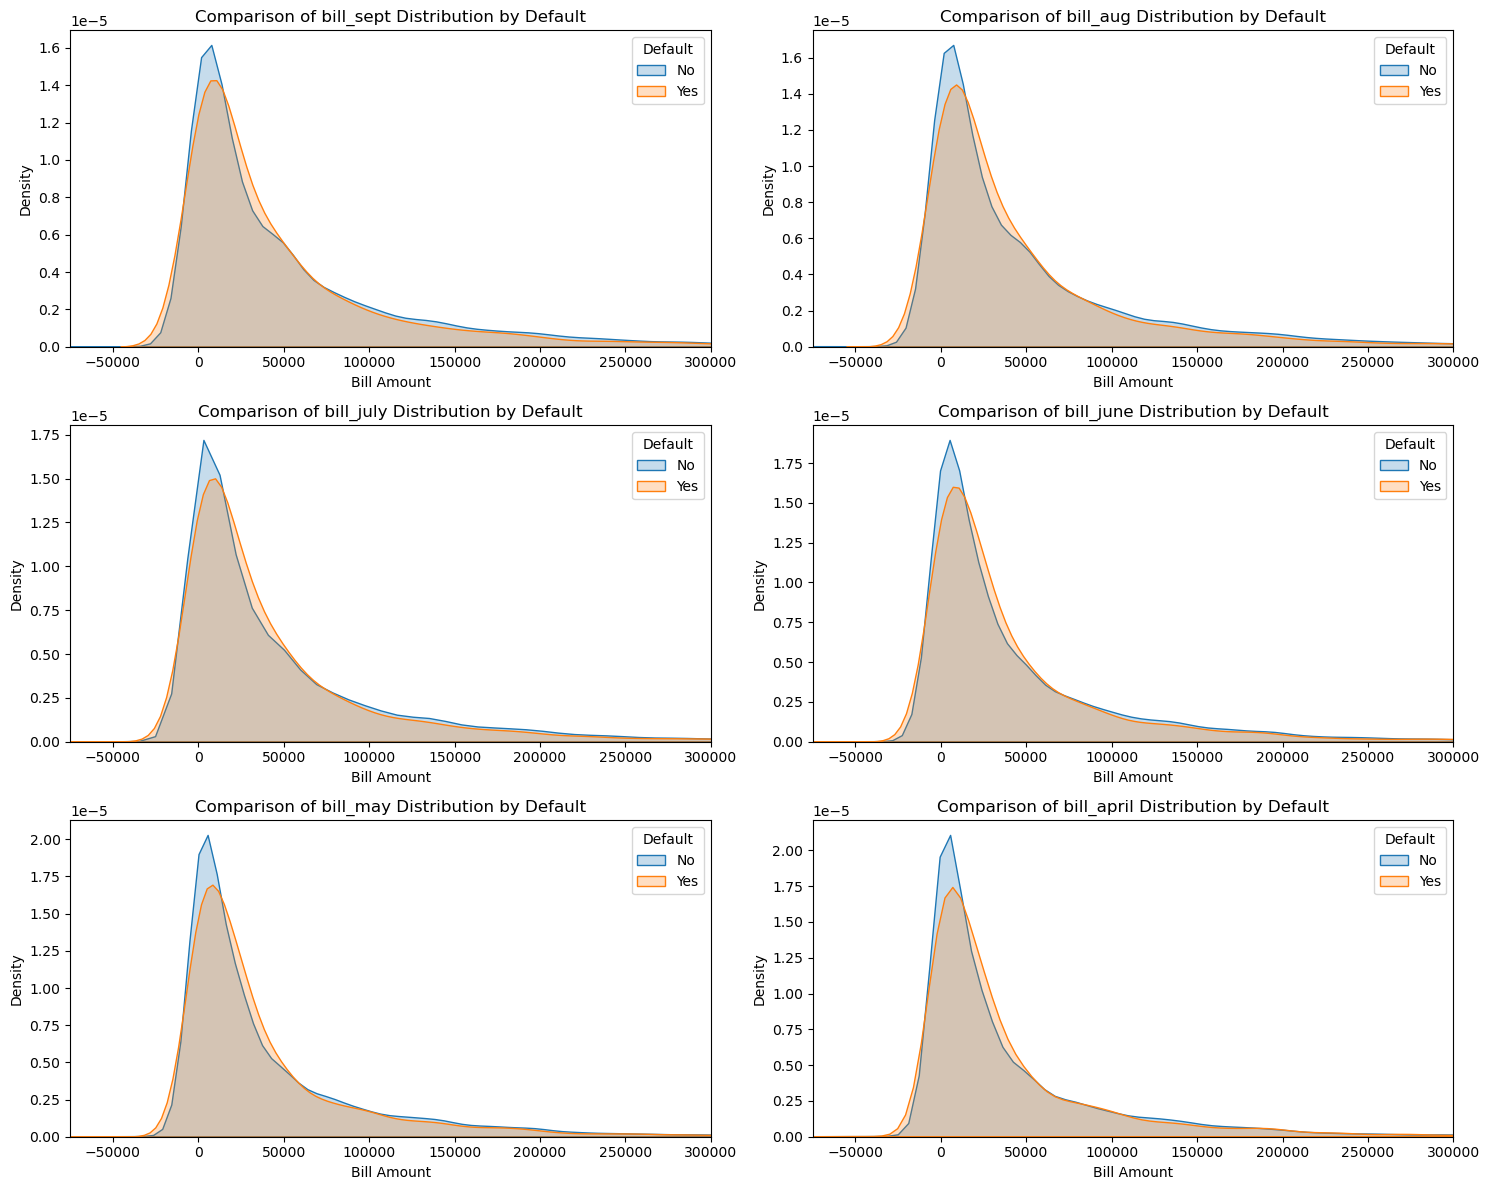

In [16]:
bill_variables = ['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']

# Create KDE plots comparing bill distributions by default status
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

for i, variable in enumerate(bill_variables):
    
    sns.kdeplot(df1.loc[(df1['default'] == 0), variable], label='No Default', fill=True, ax=axes.flatten()[i])
    sns.kdeplot(df1.loc[(df1['default'] == 1), variable], label='Default', fill=True, ax=axes.flatten()[i])
    
    axes.flatten()[i].set_title(f'Comparison of {variable} Distribution by Default')
    axes.flatten()[i].set_xlabel('Bill Amount')
    axes.flatten()[i].set_ylabel('Density')
    axes.flatten()[i].set_xlim(-75000, 300000)
    
    axes.flatten()[i].legend(title='Default', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


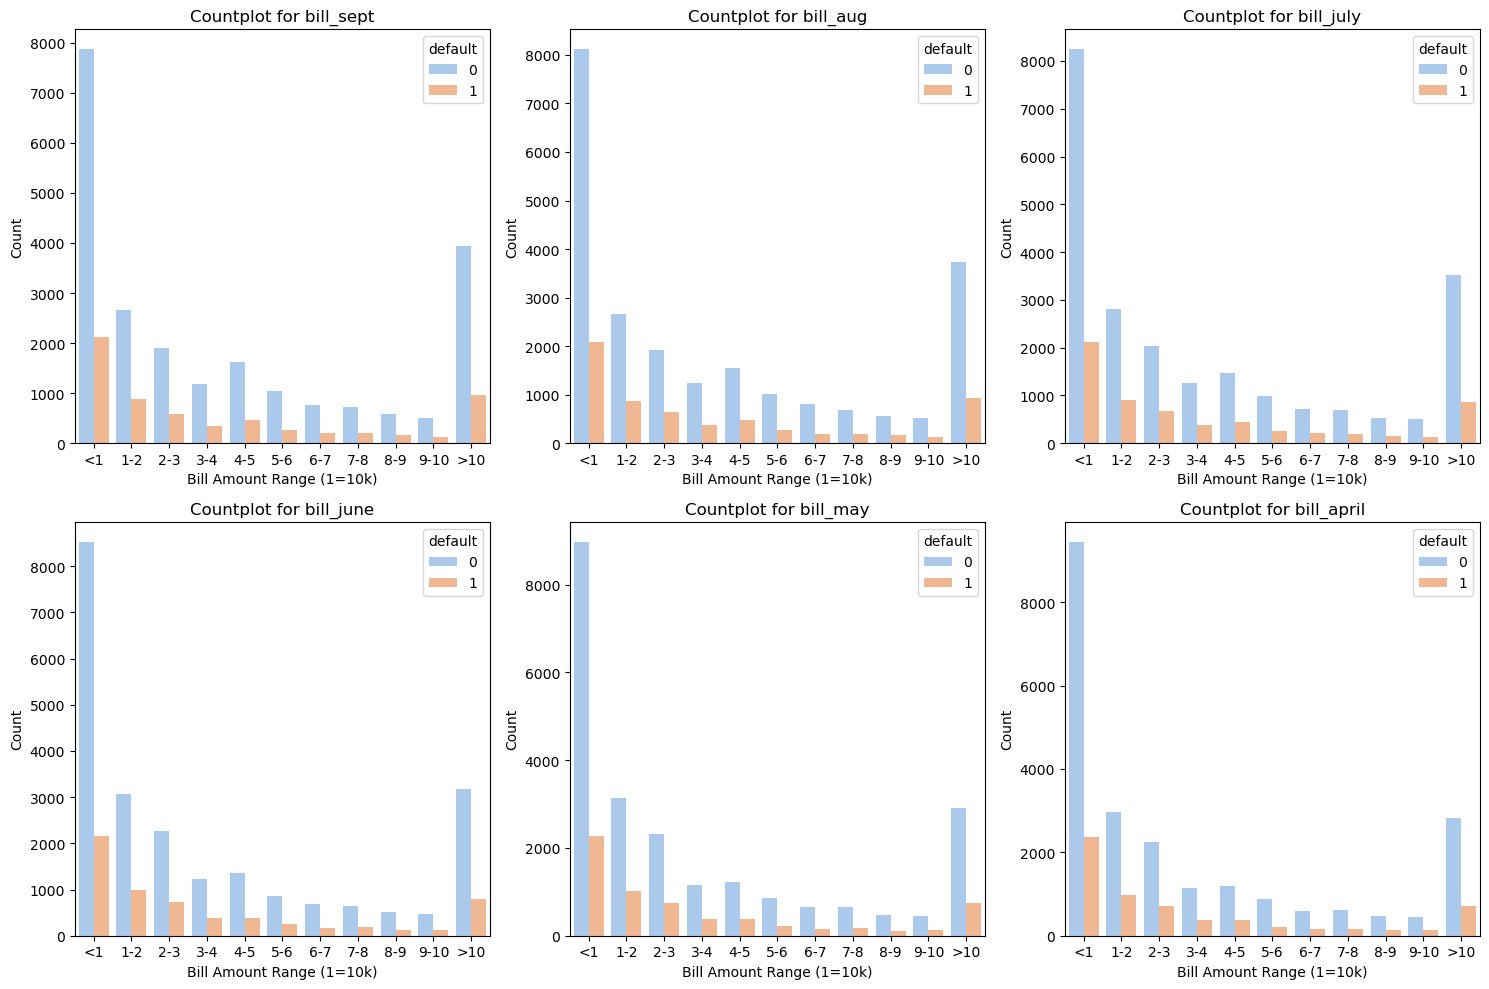

In [17]:
bins = [-float('inf'), 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, float('inf')]
labels = ['<1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '>10']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Create count plots of bill amount ranges grouped by default status
for i, variable in enumerate(bill_variables):
    
    df1[f'bill_{variable[-3:]}_group'] = pd.cut(df1[variable], bins=bins, labels=labels, include_lowest=True)
    sns.countplot(x=f'bill_{variable[-3:]}_group', hue='default', data=df1, palette='pastel', ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'Countplot for {variable}')
    axes.flatten()[i].set_xlabel('Bill Amount Range (1=10k)')
    axes.flatten()[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

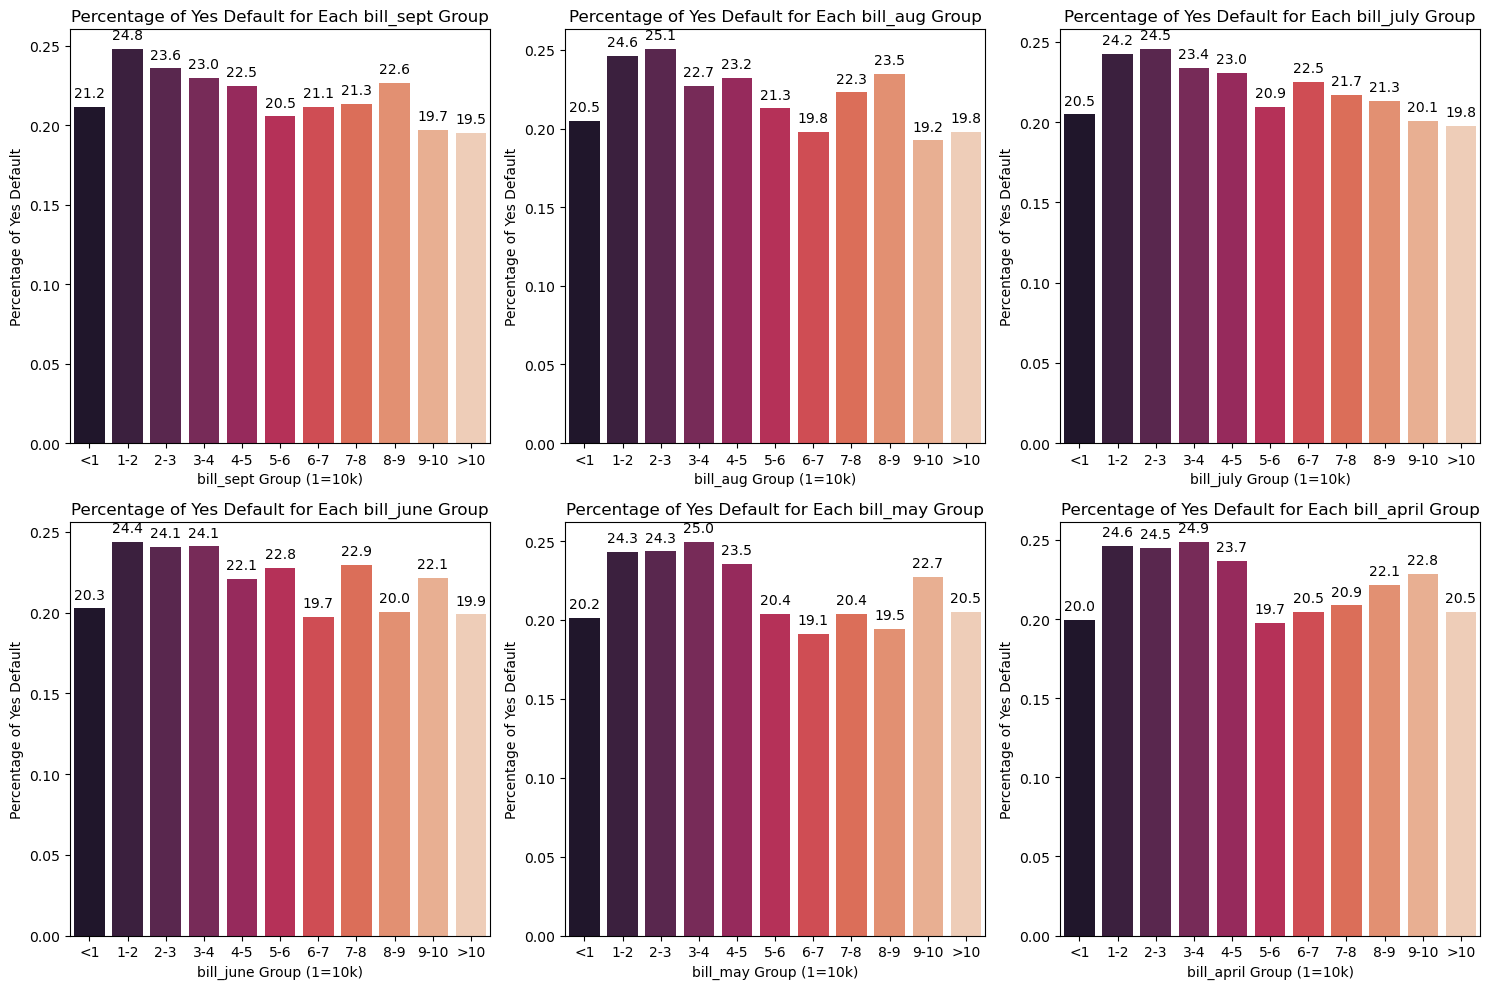

In [18]:
# Create bar plots of percentage of default cases within each bill variable

bins = [-float('inf'), 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, float('inf')]
labels = ['<1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '>10']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

bill_variables = ['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']

for i, variable in enumerate(bill_variables):
    df1[f'{variable}_group'] = pd.cut(df1[variable], bins=bins, labels=labels, include_lowest=True)
    data = df1[df1['default'] == 1].groupby(f'{variable}_group').size() / df1.groupby(f'{variable}_group').size()
    data = data.reset_index(name='Percentage')
    barplot = sns.barplot(x=f'{variable}_group', y='Percentage', data=data, palette='rocket', ax=axes.flatten()[i])

    for p in barplot.patches:
        barplot.annotate(f"{p.get_height()*100:.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

    axes.flatten()[i].set_title(f'Percentage of Yes Default for Each {variable} Group')
    axes.flatten()[i].set_xlabel(f'{variable} Group (1=10k)')
    axes.flatten()[i].set_ylabel('Percentage of Yes Default')

plt.tight_layout()
plt.show()

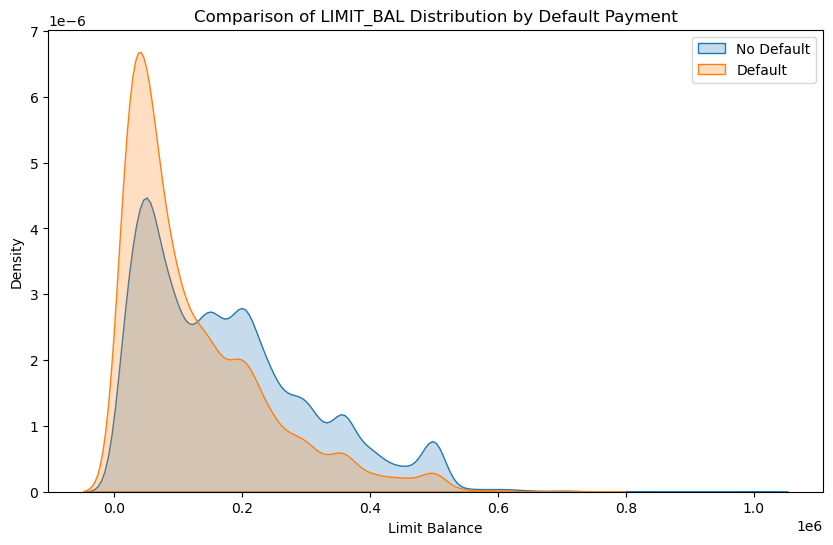

In [19]:
# Plot KDE plot for LIMIT_BAL distribution by default payment
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[(df['default'] == 0), 'LIMIT_BAL'], label='No Default', fill=True)
sns.kdeplot(df.loc[(df['default'] == 1), 'LIMIT_BAL'], label='Default', fill=True)

plt.title('Comparison of LIMIT_BAL Distribution by Default Payment')
plt.xlabel('Limit Balance')
plt.ylabel('Density')

plt.legend()
plt.show()

In [20]:
# Calculate the correlation matrix
cor=df.corr()
cor

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,repayment_status_sept,repayment_status_aug,repayment_status_july,repayment_status_june,repayment_status_may,...,bill_may,bill_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,default,is_outlier
LIMIT_BAL,1.000000,0.025684,-0.246148,-0.106149,0.141168,-0.276583,-0.295156,-0.284266,-0.264674,-0.245704,...,0.308698,0.303246,0.201931,0.183767,0.216524,0.209654,0.223523,0.225815,-0.167660,0.400476
SEX,0.025684,1.000000,0.007737,-0.030971,-0.092565,-0.058370,-0.070926,-0.065939,-0.059574,-0.054201,...,-0.015855,-0.015597,0.000529,-0.000952,-0.008060,-0.001543,-0.001278,-0.002281,-0.040357,0.002966
EDUCATION,-0.246148,0.007737,1.000000,-0.148791,0.182472,0.138537,0.153814,0.146869,0.138084,0.123125,...,-0.025273,-0.019580,-0.047915,-0.043823,-0.063296,-0.045232,-0.053694,-0.058656,0.069351,-0.116495
MARRIAGE,-0.106149,-0.030971,-0.148791,1.000000,-0.411621,0.020590,0.018848,0.027844,0.028225,0.030838,...,-0.028706,-0.024381,-0.007483,-0.009137,-0.004830,-0.014158,-0.002838,-0.007936,-0.023730,-0.011924
AGE,0.141168,-0.092565,0.182472,-0.411621,1.000000,-0.040319,-0.045363,-0.048498,-0.044952,-0.049231,...,0.053598,0.051766,0.028204,0.023330,0.031148,0.023195,0.024744,0.020970,0.007203,0.034819
repayment_status_sept,-0.276583,-0.058370,0.138537,0.020590,-0.040319,1.000000,0.710842,0.605782,0.567883,0.536869,...,0.184488,0.180709,-0.082396,-0.072848,-0.073297,-0.066623,-0.060124,-0.060832,0.338932,-0.131246
repayment_status_aug,-0.295156,-0.070926,0.153814,0.018848,-0.045363,0.710842,1.000000,0.748711,0.636595,0.594129,...,0.199128,0.197557,-0.100456,-0.073494,-0.072469,-0.063580,-0.053261,-0.051113,0.296735,-0.133434
repayment_status_july,-0.284266,-0.065939,0.146869,0.027844,-0.048498,0.605782,0.748711,1.000000,0.760856,0.663401,...,0.203392,0.200901,-0.014856,-0.081284,-0.069426,-0.062405,-0.051651,-0.050147,0.266068,-0.120772
repayment_status_june,-0.264674,-0.059574,0.138084,0.028225,-0.044952,0.567883,0.636595,0.760856,1.000000,0.806403,...,0.222088,0.218621,-0.025784,-0.013862,-0.085812,-0.059558,-0.049150,-0.040370,0.246135,-0.095048
repayment_status_may,-0.245704,-0.054201,0.123125,0.030838,-0.049231,0.536869,0.594129,0.663401,0.806403,1.000000,...,0.250070,0.242920,-0.022479,-0.015223,-0.004626,-0.075067,-0.048979,-0.036777,0.233117,-0.075962


<Axes: >

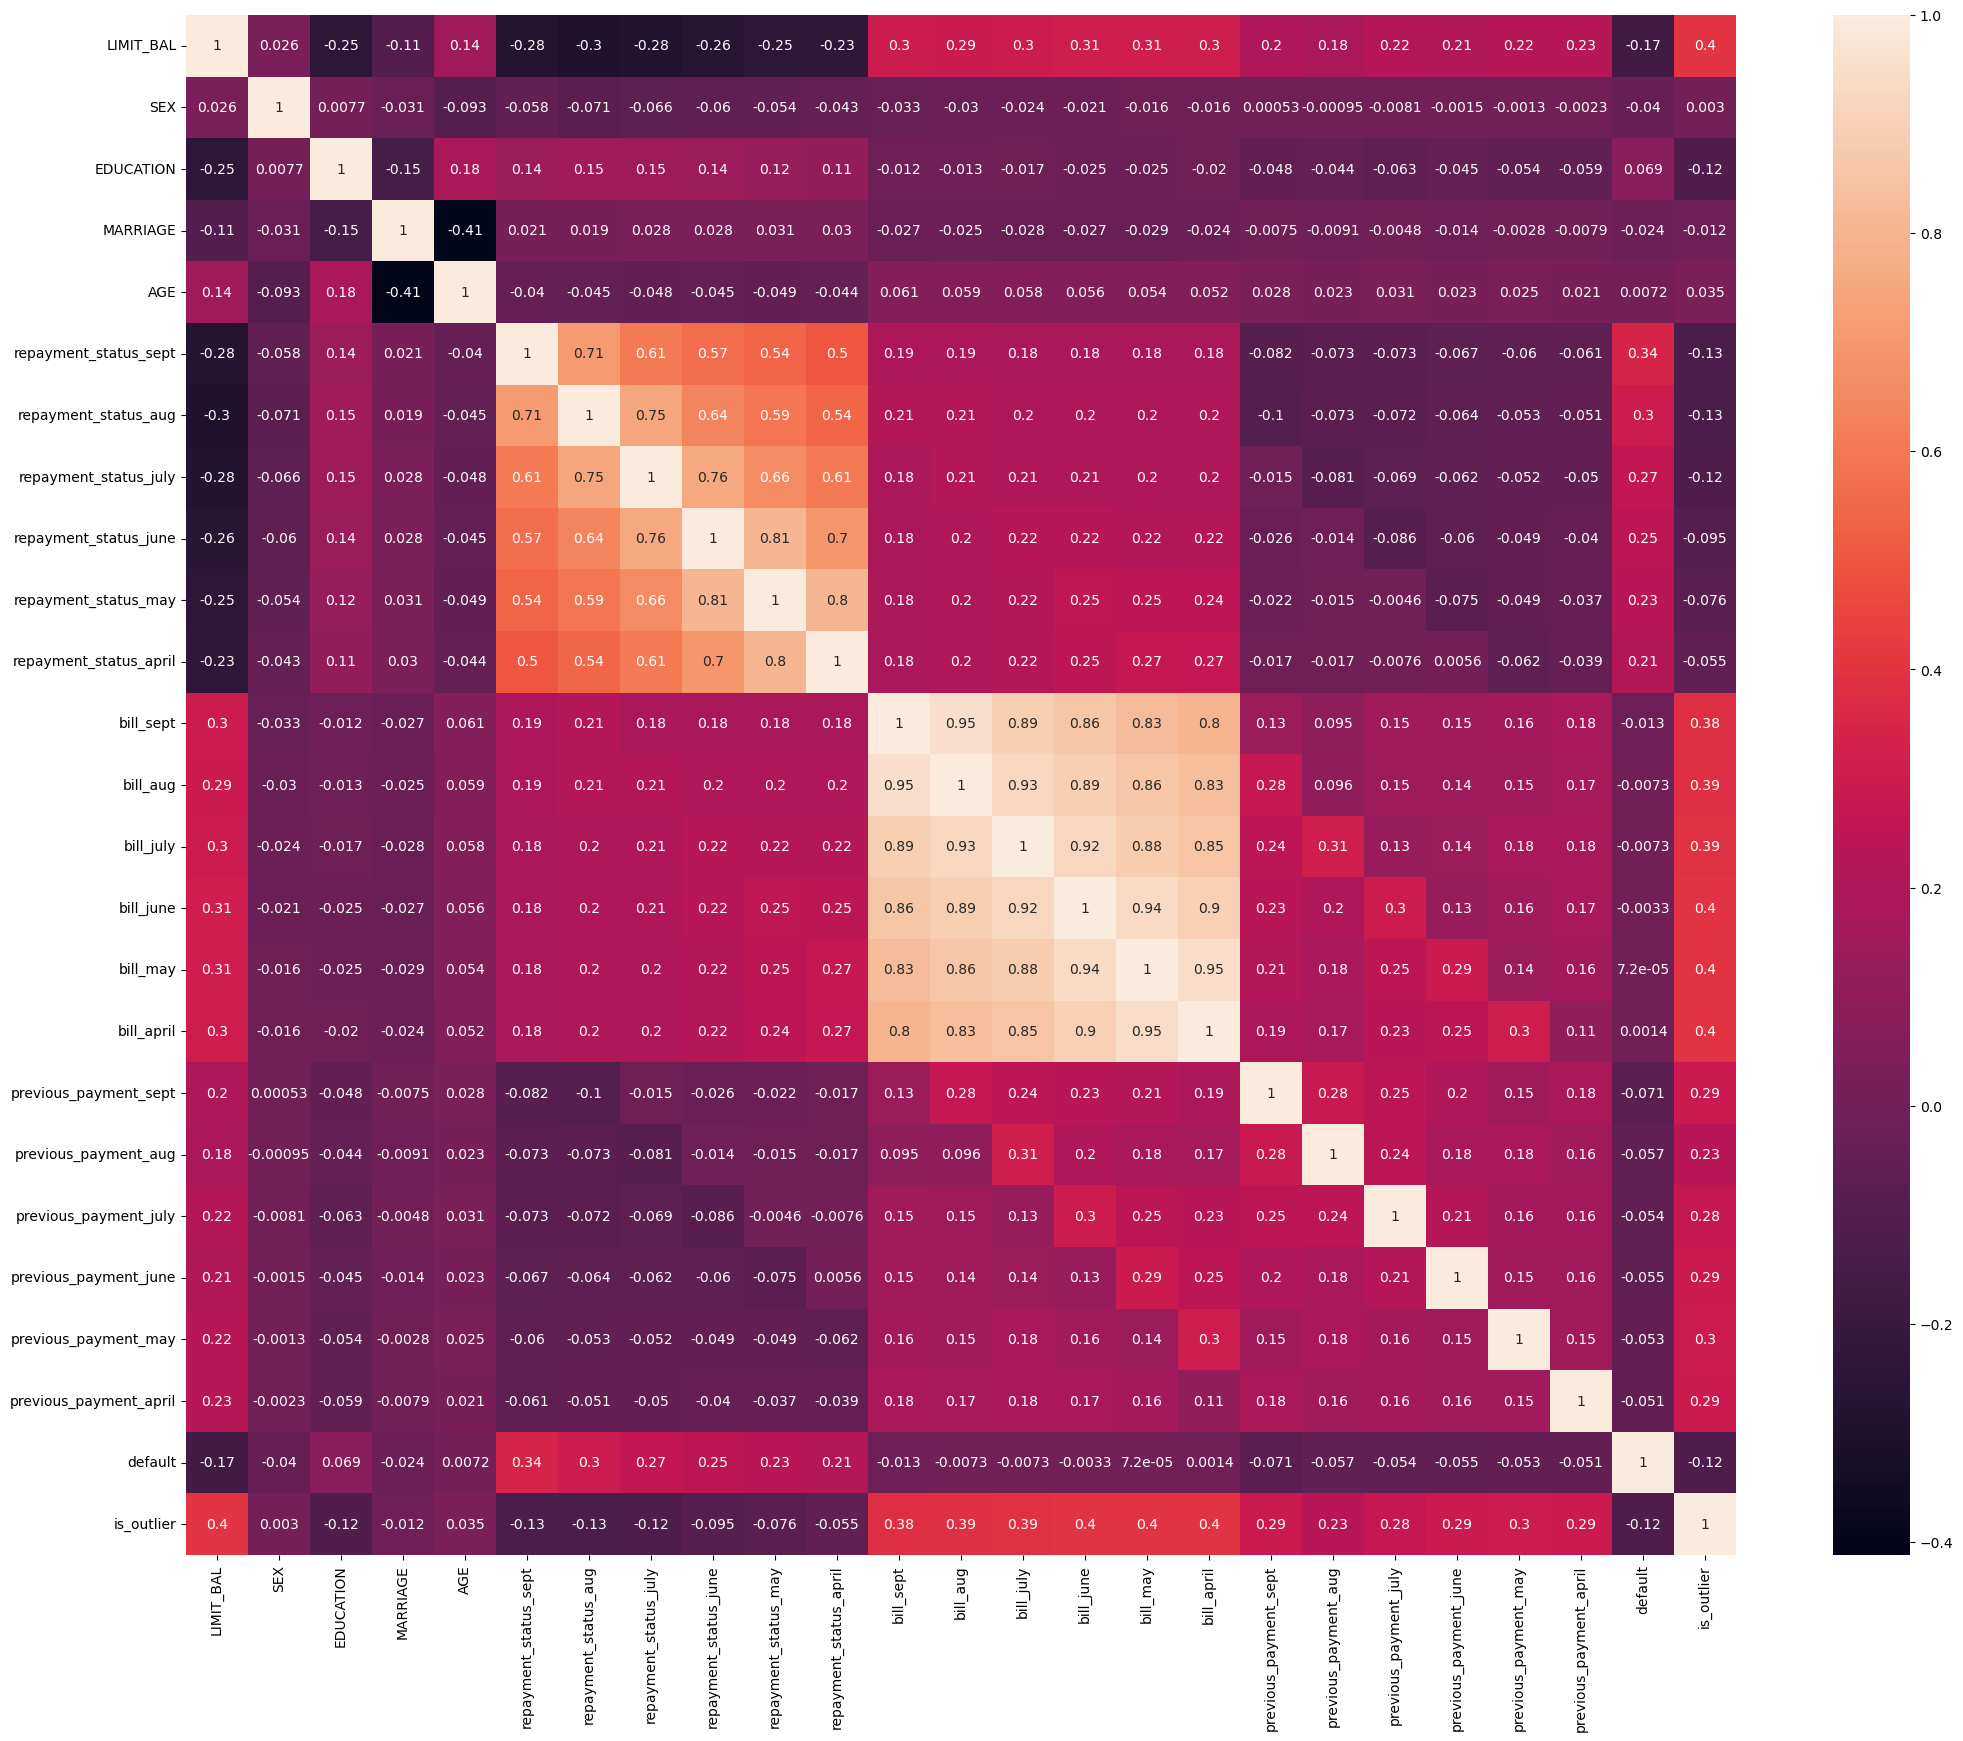

In [21]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(cor, annot=True)

   **EDA summarize**:
  The code begins with data preprocessing, converting specific columns to categorical variables for analysis. It then proceeds to visualize default payment percentages through pie and bar charts categorized by gender, education level, and marital status, while also examining age distributions and repayment statuses through histograms, KDE plots, and bar plots. Correlation analysis is conducted to understand feature relationships with default payments. Further visualizations include comparing bill amount distributions across months, default percentages within bill amount ranges, and credit limit distributions between default and non-default cases using KDE plots, count plots, and bar plots.
  
  
  The dataset analysis reveals several insights into the factors influencing default payment predictions:

1. **Client Demographics**:
   - The dataset consists of a majority (78%) of clients who are not expected to default on their payments, while the remaining 22% are expected to default.
   - The age distribution indicates that the dataset has a higher number of clients in the age bracket of 20 to 40, suggesting a predominantly young to mid-aged clientele.

2. **Repayment Behavior**:
   - Clients with a history of payment delays extending beyond four months exhibit a significantly high chance of default. This underscores the importance of timely repayments in predicting default probabilities.
   - The analysis of repayment status across the past six months reveals multicollinearity among the features, indicating interdependencies between repayment behavior variables.

3. **Bill Statement**:
   - Clients with negative bill statements (indicating a credit balance) are less likely to default. This suggests that a positive bill statement, where the client owes money, is associated with a higher default probability.
   - The plot indicates a higher proportion of clients with high bill amounts but low payments, suggesting potential financial strain among these clients.

4. **Previous Payment Amounts**:
   - Clients with very low previous payment amounts, nearly zero, exhibit a higher likelihood of default. This highlights the importance of analyzing previous payment behaviors in predicting default probabilities.

5. **Education Level**:
   - A decrease in education level correlates with a decrease in limit balance, with lower education levels associated with higher default probabilities. This suggests that education level may serve for financial stability or capability to repay debts.

6. **Marital Status**:
   - Clients with marital status categorized as "Others" (possibly divorced) demonstrate a notably higher chance of default. This indicates a potential correlation between marital status and financial stability.

7. **Age Group**:
   - Certain age groups exhibit higher default likelihoods, including individuals aged 20 to 25 and those above 50, with default probabilities. This suggests that age may influence financial behavior and ability to meet payment obligations.

8. **Credit Limit**:
   - Clients with higher credit limits are less prone to default, while those with credit limits below 50,000 have a high likelihood of default. This emphasizes the importance of credit limits in assessing default probabilities and clients' financial capacity.